# Student Information
#### Name: Salman Sohail
#### Student Number: GH1027482
#### Module Name: Big Data Analytics
#### Module code: M507B
#### Data set link: https://www.kaggle.com/datasets/mexwell/stress-detection-from-social-media-articles/data



# Healthcare Company Leveraging Social Media Stress Detection

## Introduction:
A progressive healthcare company supports mental health by doing new research, introducing better therapeutics, and giving multidimensional aid to people at large. It designs individual mental healthcare packages with the help of telemedicine that are both pragmatic and attainable.
## Problem Statement:
The healthcare organization wants to leverage social media analytics to delve into community mental health trends and stress indicators. The main outcome they want is to put together a strong system that can detect and analyze stress levels in social media posts Reddit to allow for predictable mental health interventions.
## Objective:
Develop an NLP-driven solution to analyze social media articles for stress detection. This will enable the healthcare company to:
* Identify prevalent stressors and triggers among the population.
* Tailor mental health services and wellness programs to address specific stress-related issues effectively.
* Enhance patient engagement and support through targeted interventions.
## DataSet Overview
The dataset is a collection of articles posted by users on the Reddit platform. The dataset is in CSV format file and features are separated by semicolon ";".
#### Useful Features as per our problem statement
I am going to use 2 features 'Body_Title'& 'label' for the dataset
* Body_TitleiewContain unclean text of an article written by Reddit users
* label This features has to labels 1 & 0; 1 = Positive Stress and 0 = Negative Stress

## Methodology
 
* Data Extract: I am using data from Kaggle in a CSV file by using the pandas read function
* Data split in train and test in the very start to avoid data leakage. train data is going to be used throughout the initial steps and after model training and tuning, I am going to use the test dataset on the final prediction of the model in model evaluation. 
* Data Preprocessing: Cleaning and preprocessing the data is very important for any machine learning task. In text classification I am going to apply some preprocessing techniques like lowercasing, removing numbers, removing white space, removing punctuation, tokenization, stopword removal, and lemmatization*.
* Feature Extraction: Change the text to numbers using methods such as TFIDF.
* Model Training: First I will train 2 Regression and SVM models and evaluate the model with validation data to ensure which model is suitable for further tuning and final evaluation of a model.
* Hyperparameter tuning of the best model for final prediction on the test set.
* Model Evaluation: Evaluate the model's performance accuracy matrics
## High-Level System Diagram

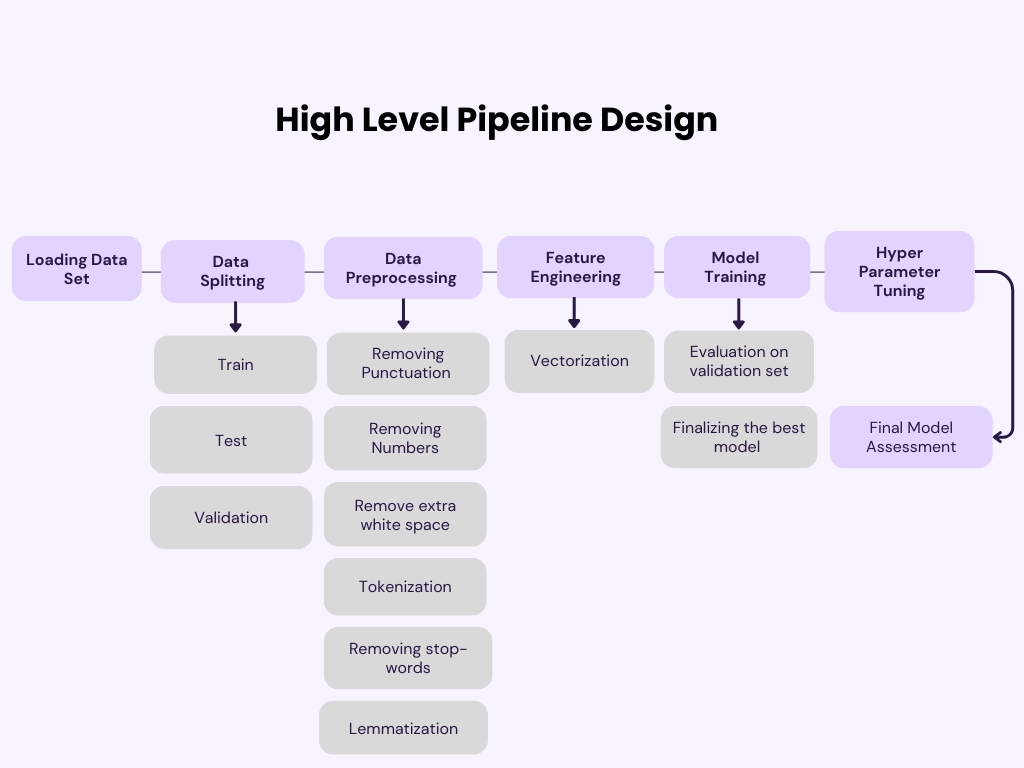

# Importing Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import re

# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

# Machine learning libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [2]:
nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Moiz Amir
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Moiz Amir
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Moiz Amir
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Moiz Amir Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Loading Dataset
As the data is in a CSV file so I am using the pandas function as pd to read data. The data is separated by semi-colon and I am going to use 2 most important features from the dataset.

In [3]:
# Loading dataset using pandas read function 
df = pd.read_csv('Reddit_Combi.csv' , sep=';', usecols=['Body_Title', 'label'])
df.head()

,Body_Title,label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


# Data Splitting 
Data splitting into train and test datasets to avoid data leakage. X_train going to be used throughout the preprocessing and then X_train will split into train and validation to validate a model to find the best model.

In [4]:

# Splitting 'Body_Title' into X_train and X_test
X_train, test = train_test_split(df, test_size=0.2, random_state=42)
X_test = test['Body_Title']
y_test = test['label']

# Checking sizes
print('Training Dataset Size:', len(X_train))
print('Test Dataset Size:', len(X_test))

Training Dataset Size: 2498
Test Dataset Size: 625


Checking high level data insight using info() function 

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498 entries, 1746 to 860
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Body_Title  2498 non-null   object
 1   label       2498 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.5+ KB


Checking if there is any null values in our dataset 

In [6]:
print(X_train.isnull().sum())

Body_Title    0
label         0
dtype: int64


Checking if there is any Duplicate values in our dataset

In [7]:
X_train.duplicated().sum()

0

# Data Preprocessing

### Coverting text lowercase and displaying the top 5 rows to make sure that is sucessfully converted to lowercase

In [8]:
# Convering text to lowercase 
X_train['Body_Title-lower'] = X_train['Body_Title'].str.lower()
print(X_train['Body_Title-lower'].head())

1746    help with cleaning i've been really struggling...
1967    too noisy to concentrate i’m in my senior year...
2756    unemployment need a job so i m just sterssing ...
3119    breakdown i really think i lost my mind last n...
2488    help with stress idk if this is going to get a...
Name: Body_Title-lower, dtype: object


### Removing punctuation from a text and displaying the top 5 rows

In [9]:
# Removing punctuation from a data frame 
X_train['Body_Title-no-punct'] = X_train['Body_Title-lower'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
X_train['Body_Title-no-punct'].head()

1746    help with cleaning ive been really struggling ...
1967    too noisy to concentrate im in my senior year ...
2756    unemployment need a job so i m just sterssing ...
3119    breakdown i really think i lost my mind last n...
2488    help with stress idk if this is going to get a...
Name: Body_Title-no-punct, dtype: object

### Removing numbers (digits) from the dataset and displaying the top 5 rows 

In [10]:
# Removing numbers from a data frame 
X_train['Body_Title-num'] = X_train['Body_Title-no-punct'].apply(lambda x: re.sub(r'\d+', '', x))
X_train['Body_Title-num'].head()

1746    help with cleaning ive been really struggling ...
1967    too noisy to concentrate im in my senior year ...
2756    unemployment need a job so i m just sterssing ...
3119    breakdown i really think i lost my mind last n...
2488    help with stress idk if this is going to get a...
Name: Body_Title-num, dtype: object

### Removing extra white space from a text and displaying the top 5 rows

In [11]:
# Removing extra white spaces
X_train['Body_Title-clean'] = X_train['Body_Title-num'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
X_train['Body_Title-clean'].head()

1746    help with cleaning ive been really struggling ...
1967    too noisy to concentrate im in my senior year ...
2756    unemployment need a job so i m just sterssing ...
3119    breakdown i really think i lost my mind last n...
2488    help with stress idk if this is going to get a...
Name: Body_Title-clean, dtype: object

### Tokenizing sentence into words which will help in removing stopwords in the next step

In [12]:
# Tokenization of sentences into single tokens of word
X_train['Body_Title-tokenize'] = X_train['Body_Title-clean'].apply(word_tokenize)
X_train['Body_Title-tokenize'].head()

1746    [help, with, cleaning, ive, been, really, stru...
1967    [too, noisy, to, concentrate, im, in, my, seni...
2756    [unemployment, need, a, job, so, i, m, just, s...
3119    [breakdown, i, really, think, i, lost, my, min...
2488    [help, with, stress, idk, if, this, is, going,...
Name: Body_Title-tokenize, dtype: object

### Removing stopwords like ( I, with, been , was etc ) from text

In [13]:
# Removing stopwords 
stop_words = set(stopwords.words('english'))
X_train['Body_Title-no-stopwords'] = X_train['Body_Title-tokenize'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
X_train['Body_Title-no-stopwords'].head()

1746    [help, cleaning, ive, really, struggling, past...
1967    [noisy, concentrate, im, senior, year, univers...
2756    [unemployment, need, job, sterssing, u, guys, ...
3119    [breakdown, really, think, lost, mind, last, n...
2488    [help, stress, idk, going, get, response, ive,...
Name: Body_Title-no-stopwords, dtype: object

### Apply lemmatization on the text to make them more meaningful and bring them to their base form like ( cleaning to clean or struggling to struggle )

In [14]:
# Define the lemmatization function for a single sentence
def lemmatize_sentence(sentence):
    """Lemmatizes a given sentence using the spaCy 'en_core_web_sm' model.

    Args:
        sentence (str): The sentence to be lemmatized.

    Returns:
        str: The lemmatized sentence.
    """
    doc = nlp(sentence)
    lemmatized_sentence = " ".join([token.lemma_ for token in doc])
    return lemmatized_sentence


# First need to covert word token to sentence to apply lemmatization 
X_train['sentences'] = X_train['Body_Title-no-stopwords'].apply(lambda tokens: " ".join(tokens))

# Apply the lemmatization function using spaCy's nlp. pipe for batch processing
lemmatized_texts = []
for doc in nlp.pipe(X_train['sentences'], batch_size=50):
    lemmatized_texts.append(" ".join([token.lemma_ for token in doc]))

# Add lemmatized texts to the DataFrame
X_train['lemmatized_text'] = lemmatized_texts

print(X_train['lemmatized_text'].head())

1746    help clean I ve really struggle past month dep...
1967    noisy concentrate I m senior year university e...
2756    unemployment need job stersse u guy deal unemp...
3119    breakdown really think lose mind last night i ...
2488    help stress idk go get response I ve lose moti...
Name: lemmatized_text, dtype: object


# Feature Engineering

## Now Splitting data for validation datset from train dataset 

In [15]:
X = X_train['lemmatized_text']
y = X_train['label']

# Split data for training and validation of a model
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape


(1998,)

## Applying Vectoration with ngram range of 1,3 to vectorize the train, validation and test dataset 

In [16]:
# vectorization on training set 
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train = vectorizer.fit_transform(x_train)

# vectorization on validation set 
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_val  = vectorizer.fit_transform(x_val)

# vectorization on test set 
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_test_Vec = vectorizer.fit_transform(X_test)
print(X_train)
print(X_val)
print(X_test_Vec)

  (0, 3454)	0.08971269792704889
  (0, 4074)	0.11702073969030576
  (0, 2528)	0.10542225875868004
  (0, 1414)	0.10631242480909656
  (0, 2507)	0.09398257640921132
  (0, 4915)	0.11035584953197536
  (0, 4302)	0.11702073969030576
  (0, 2785)	0.23737142554417498
  (0, 4916)	0.10631242480909656
  (0, 4921)	0.12252557047583033
  (0, 4158)	0.11868571277208749
  (0, 938)	0.030135210948898317
  (0, 3453)	0.08971269792704889
  (0, 3899)	0.10297615194045637
  (0, 593)	0.10724603042261878
  (0, 2218)	0.12252557047583033
  (0, 243)	0.12733450205038693
  (0, 4893)	0.0685634765679422
  (0, 4442)	0.06478130693722692
  (0, 3311)	0.08824003922113251
  (0, 4073)	0.0693393309225517
  (0, 3873)	0.0544329108675458
  (0, 1442)	0.08859771541685606
  (0, 3237)	0.09398257640921132
  (0, 1410)	0.05348777460026689
  :	:
  (1997, 3541)	0.23277154700536193
  (1997, 4064)	0.17594841868291883
  (1997, 4385)	0.18160859399881837
  (1997, 4384)	0.18160859399881837
  (1997, 1468)	0.19770820819701782
  (1997, 532)	0.13704111

# Model Initial training and evaluation on Validation dataset

In [17]:

# Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_pred_val = log_reg_model.predict(X_val)
log_reg_accuracy_val = accuracy_score(y_val, log_reg_pred_val)
print("Initial Logistic Regression Accuracy on Validation Data: {:.2f}%".format(log_reg_accuracy_val * 100))

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred_val = svm_model.predict(X_val)
svm_accuracy_val = accuracy_score(y_val, svm_pred_val)
print("Initial SVM Accuracy on Validation Data: {:.2f}%".format(svm_accuracy_val * 100))


Initial Logistic Regression Accuracy on Validation Data: 86.40%
Initial SVM Accuracy on Validation Data: 85.60%


### we have found that in inital training Logistic Regression is slightly bettter performing then the SVM so lets hyper tuning Logistic Regression further

# Hyper Parameter Tuning of Logistic Regression Model 

In [18]:
# Define the parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' solver supports both 'l1' and 'l2' penalties
}

# Create the GridSearchCV object
grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)

# Print the best parameters and best cross-validated score
print("Best parameters from grid search for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best cross-validated score from grid search for Logistic Regression: {:.2f}%".format(grid_search_log_reg.best_score_ * 100))

Best parameters from grid search for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated score from grid search for Logistic Regression: 92.54%


# Final Model Evaluation using Best Parameters

Final Prediction on our trained and tuned model using test dataset

In [19]:
best_log_reg_model = grid_search_log_reg.best_estimator_
final_log_reg_pred = best_log_reg_model.predict(X_test_Vec)
final_log_reg_accuracy = accuracy_score(y_test, final_log_reg_pred)
print("Final Logistic Regression Accuracy with best parameters on Test Data: {:.2f}%".format(final_log_reg_accuracy * 100))

Final Logistic Regression Accuracy with best parameters on Test Data: 83.52%


## Evaluation Matrics 

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, final_log_reg_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, final_log_reg_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, final_log_reg_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, final_log_reg_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, final_log_reg_pred)
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
[[  5  67]
 [ 36 517]]
Accuracy: 0.84
Precision: 0.89
Recall: 0.93
F1 Score: 0.91


## Interpretation of Metrics:
* The confusion matrix shows that the model correctly predicted 522 instances out of 625 total instances.
* Precision (0.89) indicates that when the model predicts an instance as positive, it is correct 89% of the time.
* Recall (0.93) indicates that the model correctly identifies 93% of all positive instances.
* F1 Score (0.91) is a balanced metric that combines both precision and recall, providing an overall measure of the model's performance.

#### So as per confusion matrix 522/625 * 100 = 83.52% accuracy of the model prediction.

# Process and justificaiton of design decision:
## Data Splitting
* The dataset was split into training and testing sets using an 80-20 split to evaluate the final model's performance on unseen data.
## Data Preprocessing
* I converted all text to lowercase to maintain consistency.
* Punctuation, numbers, and extra whitespace were removed to streamline the text data.
* Tokenization: Splitting text into individual words or tokens.
* Stopword Removal: Removing common words that do not carry significant meaning.
* Lemmatization: Reducing words to their base form.
#### Justification:
* Tokennization: It is essential for breaking down the text into manageable pieces, allowing further preprocessing steps like stopword removal
* Stopword Removal: Removing stopwords helps in focusing on the words that carry the most information, improving the effectiveness of the model.
* Lemmatization: It helps in standardizing words, ensuring that different forms of a word are treated the same, which improves model accuracy.
## Data Splitting
* The dataset was split from train into training and validation sets using an 80-20 split to evaluate the model's performance on validation set before final prediction.
## Feature Engineering :
* Text Vectorization
I used TF-IDF vectorization to convert the text data into numerical features, making it suitable for model training.
#### Justification:
* TF-IDF helps in highlighting the most relevant words for classification, providing a more informative representation of the text data.
## Model Selection and Tuning 
* I have initally evaluated 2 models because of there following reason
* Hyperparameter tuning was performed on well and best model  to optimize the model's performance.
#### Justification:
* Logistic Regression: Chosen for its interpretability and simplicity, making it easier to understand and explain the model's decisions.
* SVM: Preferred for its effectiveness in dealing with imbalance classes, ensuring robust performance on text classification tasks.
* It ensures that the model operates at its best, leading to improved accuracy and reliability.
## Model Evaluation
* The model's performance was evaluated using metrics such as confusion matrix, precision, recall, and F1-score.
#### Justification:
* Using a range of evaluation metrics ensures a thorough understanding of the model's performance how it is behaving on positive class and negative class.
* I have used precision, recall because data is more of those article which has postive stress level 













# Benefits After Deployment
Using the stress detection model will greatly increase the healthcare company's ability to follow and correct mental health issues at the moment of occurrence. Consequently, the company will be able to offer better medical care, connect with more people in the community, and plan for ways to maintain sanity in the future. The company will continue to remain competitive providing better healthcare and healthier societies given that they use new methods of treating mental disorders.

## References 
* https://medium.com/@awaldeep/understanding-the-essentials-nlp-text-preprocessing-steps-b5d1fd58c11a
* https://towardsdatascience.com/nlp-in-python-vectorizing-a2b4fc1a339e
* https://goodboychan.github.io/python/datacamp/machine_learning/2020/07/05/01-Applying-logistic-regression-and-SVM.html